In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import calplot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))

In [3]:
df = pd.read_csv(os.path.join('..', 'data', 'my_garmin_data.tsv'), sep='\t', parse_dates=['date'])

In [4]:
df['steps_k_cnt'] = df.apply(lambda row: round(row['steps_cnt'] / 1000), axis=1)

In [5]:
def steps_grouped(steps_cnt):
    if steps_cnt <= 5000:
        return 1
    if steps_cnt <= 10000:
        return 2
    return 3

df['steps_cnt_grouped'] = df.apply(lambda row: steps_grouped(row['steps_cnt']), axis=1)

In [6]:
df['year'] = df.apply(lambda row: row['date'].year, axis=1)

In [7]:
df

,date,steps_cnt,min_hr,min_avg_hr,max_avg_hr,max_hr,resting_hr,sleep_start,sleep_end,steps_k_cnt,steps_cnt_grouped,year
0,2018-10-20,4427,45,47,121,132,45,2018-10-19 20:00:00,2018-10-20 03:00:00,4,1,2018
1,2018-10-21,7579,54,55,113,120,54,2018-10-20 20:24:00,2018-10-21 04:54:00,8,2,2018
2,2018-10-22,8615,45,48,121,133,56,2018-10-21 20:22:00,2018-10-22 05:16:00,9,2,2018
3,2018-10-23,5702,50,51,124,136,55,2018-10-22 22:35:00,2018-10-23 06:05:00,6,2,2018
4,2018-10-24,6783,45,46,117,124,55,2018-10-23 20:57:00,2018-10-24 04:52:00,7,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2023-01-04,10821,55,56,116,121,58,2023-01-04 04:31:00,2023-01-04 12:12:00,11,3,2023
1538,2023-01-05,17918,53,54,113,114,58,2023-01-05 03:17:00,2023-01-05 11:34:00,18,3,2023
1539,2023-01-06,9132,54,55,112,114,58,2023-01-06 03:54:00,2023-01-06 12:33:00,9,2,2023
1540,2023-01-07,6402,51,53,105,106,57,2023-01-07 04:01:00,2023-01-07 11:01:00,6,2,2023


In [8]:
steps = pd.Series(df['steps_k_cnt'].values, index=df['date'])
steps

date
2018-10-20     4
2018-10-21     8
2018-10-22     9
2018-10-23     6
2018-10-24     7
              ..
2023-01-04    11
2023-01-05    18
2023-01-06     9
2023-01-07     6
2023-01-08     9
Length: 1542, dtype: int64

In [9]:
# steps_cmap = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 5 + ['#35cb33'] * 5 + ['#008001'] * 15)

# calplot.calplot(steps,
#                 textformat='{:.0f}',
#                 textcolor='#999999',
#                 cmap=steps_cmap,
#                 linewidth=0.005,
#                 edgecolor='white'
#                )

In [10]:
# steps_cmap_2 = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 10  + ['#008001'] * 15)

# calplot.calplot(steps,
#                 textformat='{:.0f}',
#                 textcolor='#999999',
#                 cmap=steps_cmap_2,
#                 linewidth=0.005,
#                 edgecolor='white'
#                )

(<Figure size 1250x1020 with 7 Axes>,
 array([<AxesSubplot: ylabel='2018'>, <AxesSubplot: ylabel='2019'>,
        <AxesSubplot: ylabel='2020'>, <AxesSubplot: ylabel='2021'>,
        <AxesSubplot: ylabel='2022'>, <AxesSubplot: ylabel='2023'>],
       dtype=object))

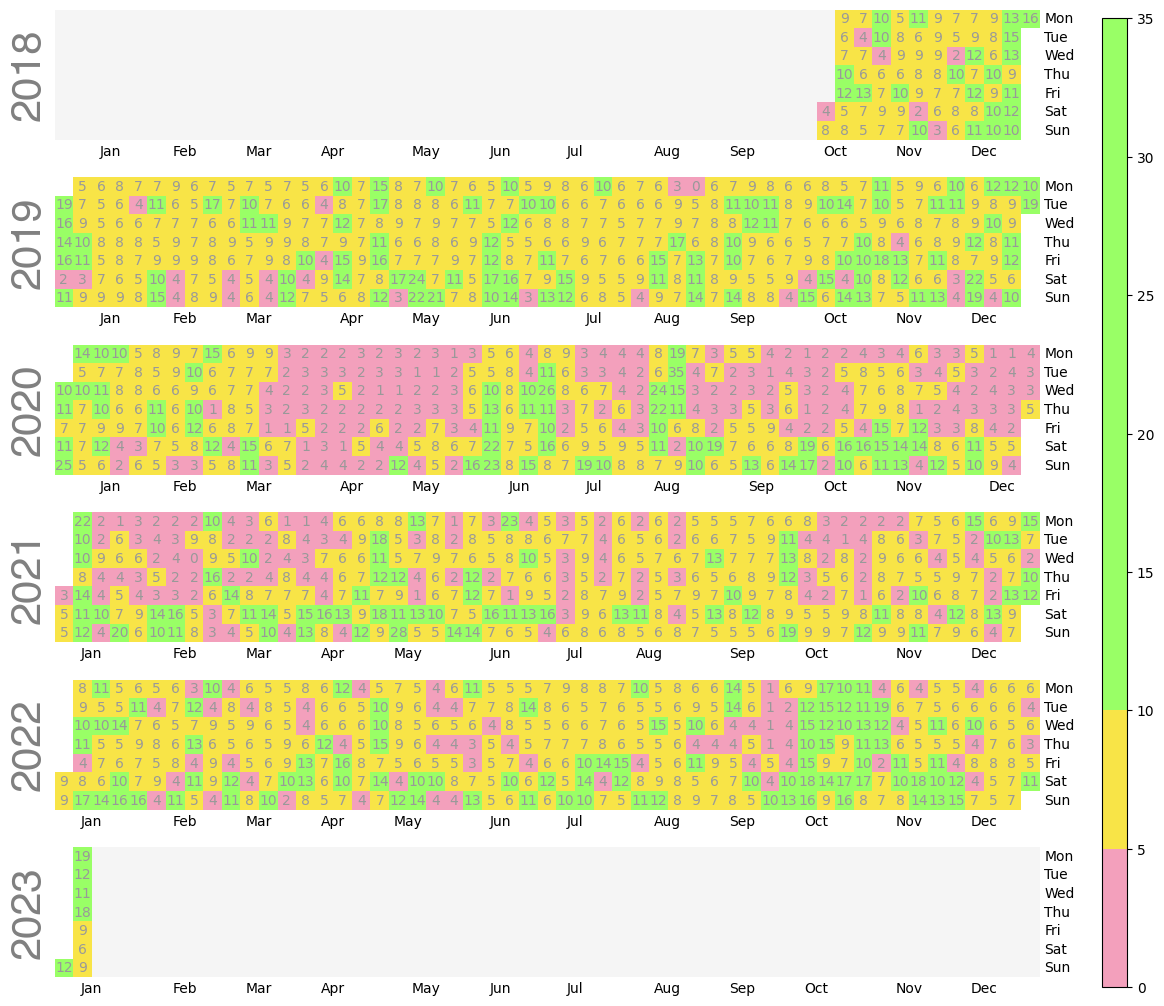

In [11]:
steps_cmap_3 = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 25)

calplot.calplot(steps,
                textformat='{:.0f}',
                textcolor='#999999',
                cmap=steps_cmap_3,
                linewidth=0.0005,
                edgecolor='white'
               )

In [12]:
grouped_steps_df = pd.DataFrame(df.groupby(['year', 'steps_cnt_grouped']).count()['date'])
grouped_steps_df = grouped_steps_df.reset_index()
grouped_steps_df

,year,steps_cnt_grouped,date
0,2018,1,7
1,2018,2,51
2,2018,3,15
3,2019,1,40
4,2019,2,240
5,2019,3,85
6,2020,1,175
7,2020,2,134
8,2020,3,57
9,2021,1,128


In [13]:
grouped_steps_df_better = grouped_steps_df.pivot(index='year', columns='steps_cnt_grouped', values='date').add_prefix('steps_group_').reset_index()
grouped_steps_df_better

steps_cnt_grouped,year,steps_group_1,steps_group_2,steps_group_3
0,2018,7.0,51.0,15.0
1,2019,40.0,240.0,85.0
2,2020,175.0,134.0,57.0
3,2021,128.0,177.0,60.0
4,2022,91.0,190.0,84.0
5,2023,NaN,3.0,5.0


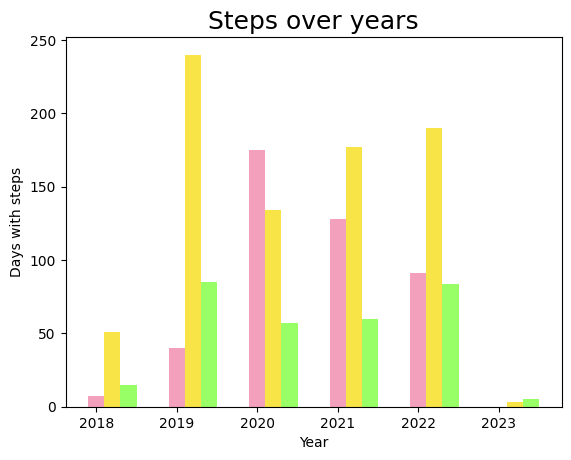

In [14]:
width = 0.2
plt.bar(x=grouped_steps_df_better['year'],
        height=grouped_steps_df_better['steps_group_1'],
        width=width,
        color='#f3a0bc'
       )
plt.bar(x=grouped_steps_df_better['year']+width,
        height=grouped_steps_df_better['steps_group_2'],
        width=width,
        color='#f8e447'
       )
plt.bar(x=grouped_steps_df_better['year']+width*2,
        height=grouped_steps_df_better['steps_group_3'],
        width=width,
        color='#99ff66'
       )
plt.title('Steps over years', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Days with steps')
plt.show()

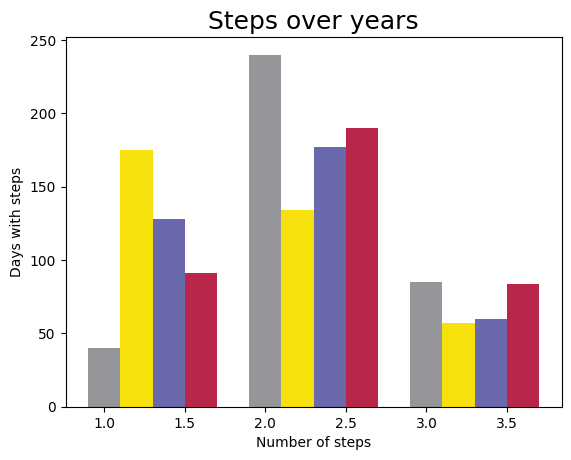

In [15]:
width = 0.2

year_colors = {
    '2019': '#949699',
    '2020': '#f7e10d',
    '2021': '#6969ab',
    '2022': '#ba264a'
    
}

for year_order, year in enumerate(year_colors.keys()):
    for steps_group in range(1, 4):
        plt.bar(x=steps_group+width*year_order,
                height=grouped_steps_df_better[grouped_steps_df_better['year']==int(year)][f'steps_group_{steps_group}'],
                width=width,
                color=year_colors[year]
               )

plt.title('Steps over years', fontsize=18)
plt.xlabel('Number of steps')
plt.ylabel('Days with steps')
plt.show()